# K-mean clusters

how it Work

    - create centers
        - n-clustres as parameter n is any number
    - acc to centers distribute points
    - minimize distance 
    - optimize algorithm by repeating whole process
  
terms

    - center - the centroids of each group
        - it has points where the point is some of features points
    - lablels
        - indexes of group which represent color we can say
    - cluster 
        - class 
            - having property of centers and points
    

In [9]:
# importing lib
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [10]:
# loading data
features , color_group = make_blobs(centers=3,random_state=42)

c:\users\aditya\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

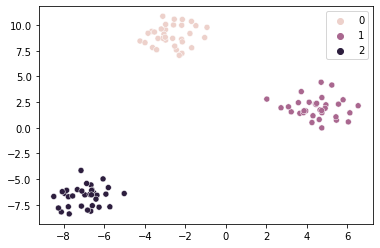

In [12]:
# ploting data 
sb.scatterplot(features[:,0],features[:,1],hue=color_group)

In [13]:
# importing lib
import random

In [7]:
# this is cluster class where it has it's center and points for each group
class Cluster:
    def __init__(self,center):
        self.center=center
        self.points=[]
    # formula or calculating distance from given point        
    def distance(self,point):
        return np.sqrt(np.sum((point-self.center)**2))
# main class
class K_mean:
    # initializing n_clusters and iterations in contructor     
    def __init__(self,n_cluster=3,max_iteration=3):
        self.n_cluster = 3
        self.max_iteration = max_iteration
    # fiting features in model      
    def fit(self,features):
        
        # choosing random n clusters         
        clusters=[]
        for i in range(self.n_cluster):
            cluster = Cluster(center=random.choice(features))
            clusters.append(cluster)
        
        # max iteration for better accuracy          
        for iteration in range(self.max_iteration):
    
            # initializing lable which is group               
            lable=[]
            # picking each point one by one              
            for point in features:
                # calculating distance from every cluster to point                  
                distance=[]
                for cluster in clusters:
                    distance.append(cluster.distance(point))
    
                # minimizing distance and add that to perticular cluster                 
                min_dis = np.argmin(distance)
                close_cluster = clusters[min_dis]
                close_cluster.points.append(point)
                lable.append(min_dis)
            
            # make cluster to center              
            for cluster in clusters:
                cluster.center = np.mean(cluster.points,axis=0)
        
        self.lable = lable
        self.cluster_center_ = np.array([cluster.center for cluster in clusters])

In [ ]:
# building model and providing 3 as n_clusters n=3
model = K_mean(3)

# fiting features to model
model.fit(features)

# getting lables as 0,1,2
new_color_group = model.lable

# ploting data 
sb.scatterplot(features[:,0],features[:,1],hue=new_color_group)

# ploating center 
for center in model.cluster_center_:
    plt.scatter(center[0], center[1], s=60)

c:\users\aditya\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
